In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [3]:
t1 = pd.read_csv("Matt_Jacob_10_8.data", delimiter = ' ', names = ["Delta_T", "Timestamp"])
t2 = pd.read_csv("muon_data_Jacob_Matt_10_10.data", delimiter = ' ', names = ["Delta_T", "Timestamp"])
# t3 = pd.read_csv("Bjon_10_15.data", delimiter = ' ', names = ["Delta_T", "Timestamp"])

In [4]:
t = t1.append(t2)
# t = t.append(t3)

In [5]:
t = t[t["Delta_T"] < 20000]

In [6]:
len(t)

2803

In [7]:
max_bins = np.arange(0,20000, 160)
print("Maximum number of bins: " + str(len(max_bins)))

Maximum number of bins: 125


In [8]:
ydata, xdata = np.histogram(t["Delta_T"], bins = max_bins)
xdata = xdata[:-1]

In [9]:
popt, pcov = curve_fit(func, xdata, ydata) #p0 = [0, 1/2197, 0]

C:\Users\Matt\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


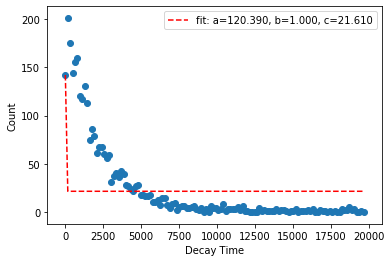

In [10]:
plt.plot(xdata, func(xdata, *popt), 'r--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.scatter(xdata, ydata)
# plt.title("Normed X-Scale")
plt.ylabel("Count")
plt.xlabel("Decay Time")
plt.legend()
plt.savefig("NonNormedData.png")

In [11]:
1/(popt[1])

1.0

In [12]:
print(str(round(popt[0], 2)) + '*e^(-' + str(round(popt[1], 2)) +'*x) + ' + str(round(popt[2], 2)))

120.39*e^(-1.0*x) + 21.61


In [13]:
x_normed = np.arange(0,len(xdata), 1)

In [14]:
popt, pcov = curve_fit(func, x_normed, ydata) #p0 = [0, 1/2197, 0]

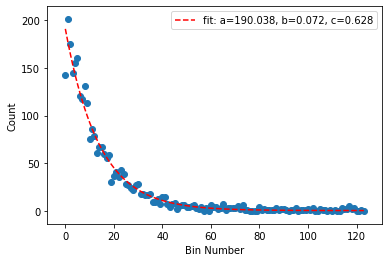

In [15]:
plt.plot(x_normed, func(x_normed, *popt), 'r--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.scatter(x_normed, ydata)
# plt.title("Normed X-Scale")
plt.ylabel("Count")
plt.xlabel("Bin Number")
plt.legend()
plt.savefig("NormedData.png")

In [16]:
tau = 1/(popt[1]/160)
print(tau)
popt[1] = popt[1]/160

2211.2251835922034


In [17]:
print(str(round(popt[0], 2)) + '*e^(-' + str(round(popt[1], 2)) +'*x) + ' + str(round(popt[2], 2)))

190.04*e^(-0.0*x) + 0.63


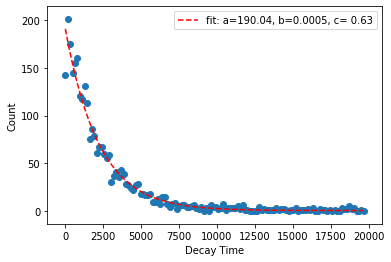

In [18]:
plt.plot(xdata, func(xdata, popt[0], popt[1], popt[2]), 'r--', label='fit: a=%5.2f, b=%5.4f, c=%5.2f' % tuple(popt))
plt.scatter(xdata, ydata)
# plt.title("Normed X-Scale")
plt.ylabel("Count")
plt.xlabel("Decay Time")
plt.legend()
plt.savefig("NormedReadjustedFit.png")